# Sales dynamics forecasting with Classical Time Series Forecasting Methods

### Creating datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_excel('rnd_contest_data.xlsx', sheet_name="REF raw data")
data['Date'] = data["Year"].map(str) + ' ' + data["Month"]
data['Date'] = pd.to_datetime(data['Date'])
dataset = data.loc[:,['Date', 'Source', 'Brand', 'Model', 'Sales Units']]
dataset.set_index("Date", inplace = True)
data_traditional = dataset[dataset["Source"] == "Traditional Sales"]
internet_sales = dataset[dataset["Source"] == "Internet Sales"]

In [170]:
brand_data = data_traditional[data_traditional["Brand"] == "SAMSUNG"]
data = pd.DataFrame(data=brand_data[brand_data["Model"] == "RB37J5000SA/UA"], columns=["Sales Units"])


Date
2018-01-01    RB37J5000SA/UA
2018-01-01    RB37J5000EF/UA
2018-01-01       RB33J3000SA
2018-01-01       RB37J5220SA
2018-01-01       RB30J3000SA
                   ...      
2018-12-01       RB31FSJNDSA
2018-12-01        RL48RRCVB1
2018-12-01         RL55TTE1L
2018-12-01    RB33J3305SS/UA
2018-12-01    RB37J5225EF/UA
Name: Model, Length: 1160, dtype: object


### Autoregression (AR)

317.9661731681567


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<function matplotlib.pyplot.show(*args, **kw)>

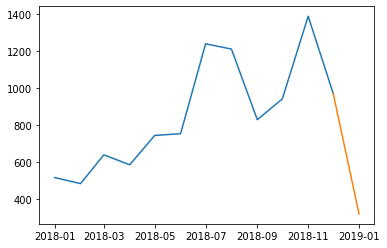

In [189]:
# AR example
from statsmodels.tsa.ar_model import AR

model = AR(data.iloc[:, 0], dates=data.index)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show

### Moving Average (MA)

D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


755.4199244738146


<function matplotlib.pyplot.show(*args, **kw)>

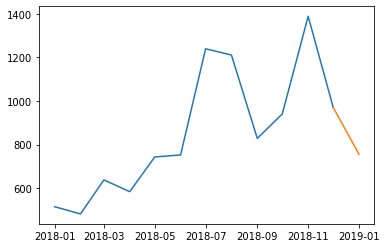

In [190]:
# MA example
from statsmodels.tsa.arima_model import ARMA

model = ARMA(data.iloc[:, 0], dates=data.index, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show

### Autoregressive Moving Average (ARMA)

In [173]:
import statsmodels.api as sm
data2diff = data.diff(periods=1).dropna()
test = sm.tsa.adfuller(data2diff.iloc[:,0])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -4.028095084151299
p-value:  0.0012703353952535784
Critical values:  {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
единичных корней нет, ряд стационарен


### Show stationary series

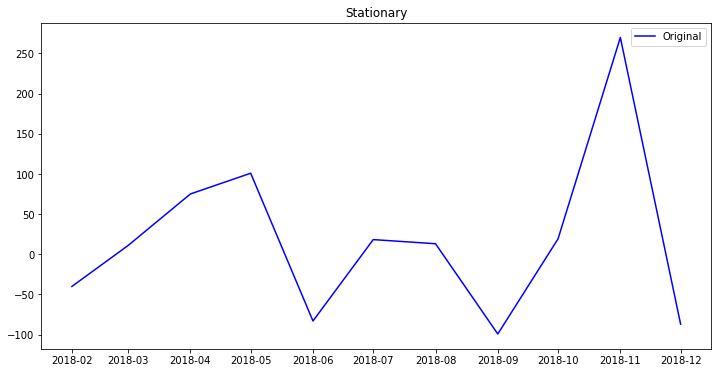

In [172]:
plt.figure(figsize = (12,6))
orig = plt.plot(data2diff, color='blue', label='Original')
plt.title("Stationary")
plt.legend(loc='best')
plt.show()

### ACF and PACF

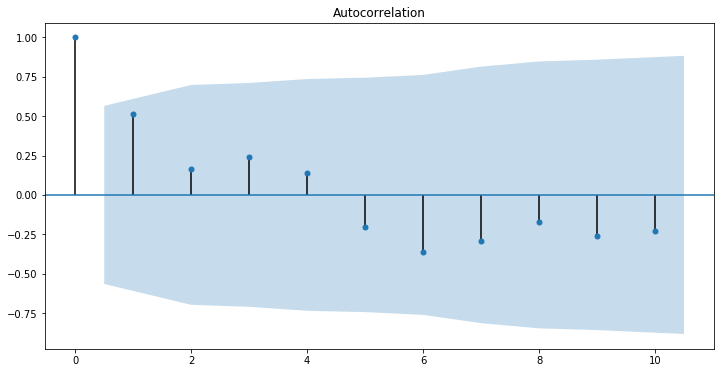

In [171]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(data.iloc[:,0], lags=10, ax=ax)
plt.show()

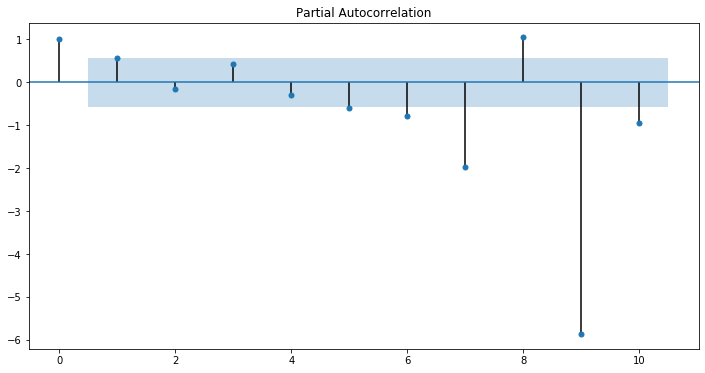

In [174]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(data.values, lags=10, ax=ax)
plt.show()

In [176]:
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(tuple(data2diff.values), (1,5)).fit()
model.summary()

D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:                     ARMA(1, 5)   Log Likelihood                 -73.361
Method:                       css-mle   S.D. of innovations            143.703
Date:                Mon, 03 Feb 2020   AIC                            162.723
Time:                        17:59:52   BIC                            165.906
Sample:                             0   HQIC                           160.716
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6070     25.985      1.640      0.176      -8.322      93.536
ar.L1.y       -0.0130      0.417     -0.031      0.977      -0.831       0.805
ma.L1.y       -0.4121      0.363     -1.137      0.319      -1.123       0.299
ma.L2.y       -0.5094      0.278     -1.832      0.141      -1.054       0.036
ma.L3.y        0.5094        nan        nan        nan         nan         nan
ma.L4.y        0.4121      0.564      0.731      0.506      -0.694       1.518
ma.L5.y       -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -77.1654           +0.0000j           77.1654            0.5000
MA.1           -0.8555           -0.5179j            1.0000           -0.4134
MA.2           -0.8555           +0.5179j            1.0000            0.4134
MA.3            0.5615           -0.8275j            1.0000           -0.1551
MA.4            0.5615           +0.8275j            1.0000            0.1551
MA.5            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""

### Autoregressive Integrated Moving Average (ARIMA)

D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1315.6511894359473


<function matplotlib.pyplot.show(*args, **kw)>

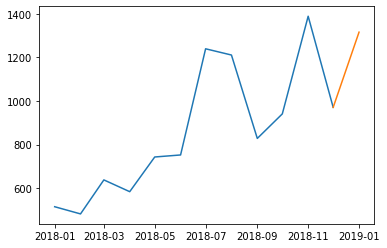

In [191]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1262.385502161403


<function matplotlib.pyplot.show(*args, **kw)>

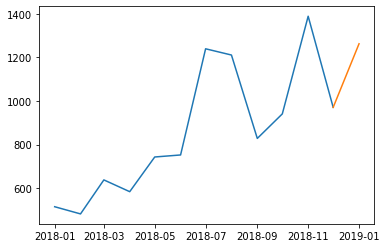

In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show

### Simple Exponential Smoothing (SES)

1070.1824264588859


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<function matplotlib.pyplot.show(*args, **kw)>

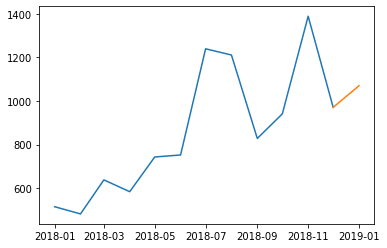

In [193]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show

### Holt Winter’s Exponential Smoothing (HWES)

1070.1824264588859


D:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<function matplotlib.pyplot.show(*args, **kw)>

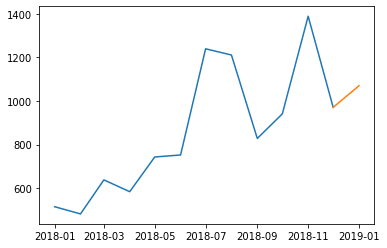

In [195]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])
plt.plot(data.index, data.iloc[:, 0])
plt.plot([data.index[-1], yhat.index[0]], [data.iloc[:, 0][-1], yhat])
plt.show